# Point particle on rotating curve

## Point particle on parabola

In [1]:
load('cas_utils.sage')

In [2]:
var('t')
var('w0 g')
xy_names = [('x','x'),('y','y')]

In [3]:
to_fun, to_var = make_symbols(xy_names)

x  :: has been  processed
y  :: has been  processed


In [4]:
dAlemb = (X.diff(t,2)-x*w0^2)*dx + (Y.diff(t,2)+g)*dy
f = 1/2*x^2 - y

In [5]:
df = diff(f,x)*dx+diff(f,y)*dy

In [6]:
eq1 = dAlemb.subs(df.solve(dx)).coefficient(dy).subs(to_var)
show(eq1)

g + ydd - (w0^2*x - xdd)/x

In [7]:
eq2 = f.subs(to_fun).diff(t,2).subs(to_var)
show(eq2)

xd^2 + x*xdd - ydd

In [8]:
sol = solve( [eq1,eq2],[xdd,ydd])
show( sol[0] )

[xdd == (w0^2 - xd^2 - g)*x/(x^2 + 1),
 ydd == ((w0^2 - g)*x^2 + xd^2)/(x^2 + 1)]

    dxy = [vars()['d'+repr(zm)] for zm in xy]
    constr = sum([dzm*f.diff(zm) for zm, dzm in zip(xy,dxy)])
    show(f)
    show(constr)

    rown1=(dAlemb.subs(constr.solve(dx)[0])*x).expand().coeff(dy).subs(to_var)
    show(rown1)
    rown2 = f.subs(to_fun).diff(t,2).subs(to_var)
    show(rown2)

    sol = solve( [rown1,rown2],[xdd,ydd])
    show( sol[0] )

In [9]:
show( sol[0][0])

xdd == (w0^2 - xd^2 - g)*x/(x^2 + 1)

In [12]:
ode=[xd,sol[0][0].rhs().subs({w0:1-0.01,g:1})]
show(ode)

[xd, -(xd^2 + 0.0199000000000000)*x/(x^2 + 1)]

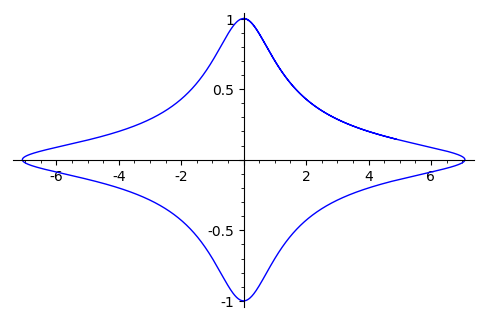

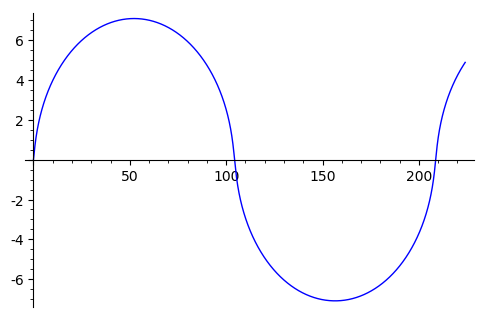

In [13]:
times = srange(0,224,0.01)
numsol = desolve_odeint(ode,[0,1],times,[x,xd])
p = line(zip(numsol[:,0],numsol[:,1]),figsize=5)
p2 = line(zip(times,numsol[:,0]),figsize=5)

p.show()
p2.show()

## Point particle on rotating circle

In [21]:
var('x y t')
var('w0 l g')

xy_names = ['x','y']
uv_names = [('phi','\phi')]

to_fun, to_var = make_symbols(xy_names,uv_names)

phi  :: has been  processed
x  :: has been  processed
y  :: has been  processed


In [22]:
x2u = {x:-l*sin(phi),y:-l*cos(phi)}

In [23]:
transform_virtual_displacements(xy_names,uv_names,verbose=True)

dx_polar : is added to namespace


[dx, -dphi*l*cos(phi)]

dy_polar : is added to namespace


[dy, dphi*l*sin(phi)]

[-dphi*l*cos(phi), dphi*l*sin(phi)]

In [24]:
x.subs(x2u).subs(to_fun)

-l*sin(Phi(t))

In [25]:
dAlemb = (x.subs(x2u).subs(to_fun).diff(t,2)-w0^2*x.subs(x2u))*dx_polar + \
         (y.subs(x2u).subs(to_fun).diff(t,2)+g)*dy_polar
dAlemb = dAlemb.subs(to_var)
show(dAlemb)

-(l*phid^2*sin(phi) + l*w0^2*sin(phi) - l*phidd*cos(phi))*dphi*l*cos(phi) + (l*phid^2*cos(phi) + l*phidd*sin(phi) + g)*dphi*l*sin(phi)

In [26]:
sol = dAlemb.expand().coefficient(dphi).trig_simplify().solve(phidd) 
show( sol)

[phidd == (l*w0^2*cos(phi)*sin(phi) - g*sin(phi))/l]

### Efffective potential

In [30]:
Ueff = -sol[0].rhs().expand().subs({g:9.81,l:1}).integrate(phi)
Ueff

1/2*w0^2*cos(phi)^2 - 9.81*cos(phi)

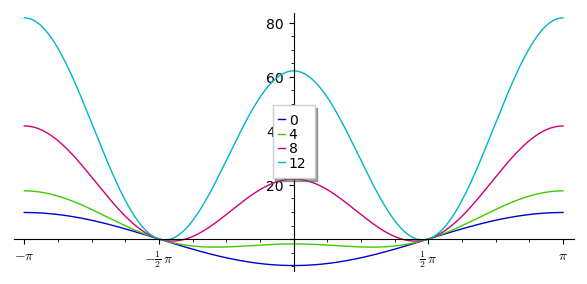

In [31]:
plot( [Ueff.subs(w0==w0_) for w0_ in [0,4,8,12]], (phi,-pi,pi),\
     legend_label=[0,4,8,12], figsize=(6,3),\
     tick_formatter=[pi,None],ticks=[pi/2,None])

### Numerical solutions

[phid, 100.200100000000*cos(phi)*sin(phi) - 9.81000000000000*sin(phi)]

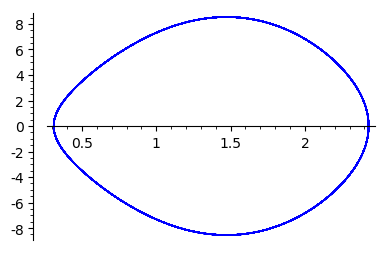

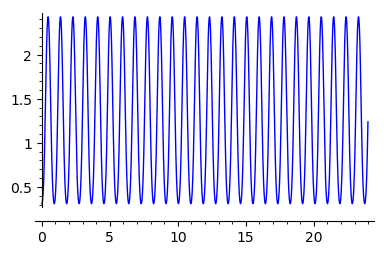

In [32]:
times = srange(0,24,0.01)
ode = [phid,sol[0].rhs().subs({l:1,w0:9.81+.2,g:9.81})]
show(ode)
numsol = desolve_odeint(ode,[0.31,0],times,[phi,phid])
p = line(zip(numsol[:,0],numsol[:,1]),figsize=4)
p2 = line(zip(times,numsol[:,0]),figsize=4)

p.show()
p2.show()

### Code generation 

We can readily generate code which can be used in external programs.

En example can be found in [simulation and 3d vis](beadk3d.ipynb)



In [43]:
from sympy import ccode

In [44]:
oderhs = sol[0].rhs()

In [45]:
ccode(oderhs._sympy_())

'(-g*sin(phi) + l*pow(w0, 2)*sin(phi)*cos(phi))/l'

\newpage